In [ ]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/netflix/netflix_titles..csv')

In [ ]:
data.shape

(8809, 12)

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Remove the unnamed columns starting from column 12 onwards

In [ ]:
data.drop(data.columns[12:], axis=1, inplace= True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [ ]:
data.describe(exclude='number')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8809,8809,8809,6175,7984,7978,8799,8805,8806,8809,8809
unique,8809,2,8806,4529,7694,748,1768,18,220,516,8777
top,s1,Movie,22-Jul,Rajiv Chilaka,David Attenborough,United States,1-Jan-20,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6132,2,19,19,2819,109,3208,1794,362,4


In [ ]:
data.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


Data preprocessing

In [ ]:
data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [ ]:
data.isnull().sum()/len(data)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.901237
cast             9.365422
country          9.433534
date_added       0.113520
release_year     0.000000
rating           0.045408
duration         0.034056
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)

In [ ]:
a = data[data['date_added'].isnull() == True]['release_year'].values

for i in range(10):
    ny.random.seed(42)
    data['date_added'].fillna(str(a[i]) + '-' + str(ny.random.randint(1,12)) + '-' + str(ny.random.randint(1,28)), inplace=True)

In [ ]:
val = ['R','TV-MA', 'TV-MA', 'R']
for i in range(data['rating'].isnull().sum()):
    data['rating'].fillna(val[i], inplace=True)

In [ ]:
val = ['74 min', '84 min', '66 min']
data[data['duration'].isnull()]['rating'] = 'PG-13'

for i in range(data['duration'].isnull().sum()):
    data['duration'].fillna(val[i], inplace=True)

In [ ]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Data transformation

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], format='mixed')
data['year_added'] = data['date_added'].dt.year

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8809 non-null   object        
 1   type          8809 non-null   object        
 2   title         8809 non-null   object        
 3   director      8809 non-null   object        
 4   cast          8809 non-null   object        
 5   country       8809 non-null   object        
 6   date_added    8809 non-null   datetime64[ns]
 7   release_year  8809 non-null   int64         
 8   rating        8809 non-null   object        
 9   duration      8809 non-null   object        
 10  listed_in     8809 non-null   object        
 11  description   8809 non-null   object        
 12  year_added    8809 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(10)
memory usage: 860.4+ KB


Data visualization

In [ ]:
def countplot(col, label, title, rotation=0, size=(12,6)):
    plt.figure(figsize=size)
    plt.title(title, fontsize=20)
    ax = sns.countplot(x=data[col], palette='viridis')
    ax.set_xlabel(label, fontsize=16)
    plt.xticks(rotation=rotation)
    ax.set_ylabel('Count', fontsize=16)
    for lab in ax.containers:
      ax.bar_label(lab)

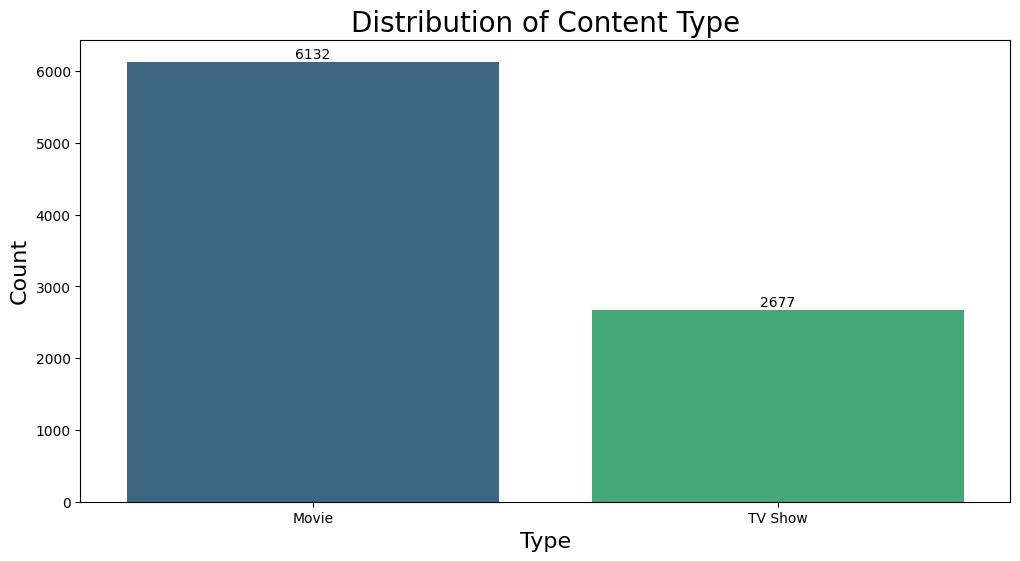

In [ ]:
countplot('type', 'Type', 'Distribution of Content Type')

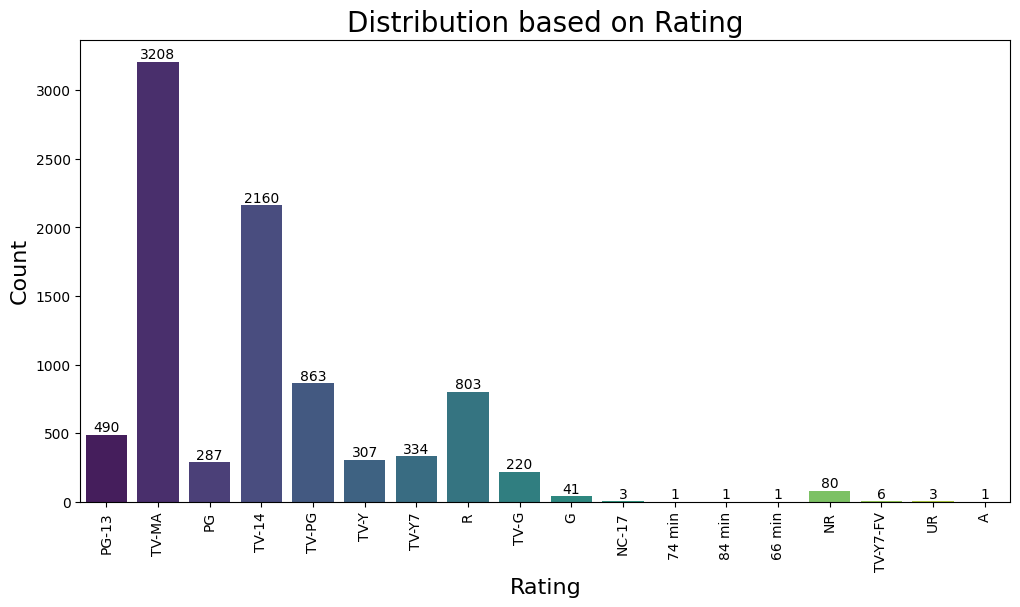

In [ ]:
countplot('rating', 'Rating', 'Distribution based on Rating', rotation=90)